In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os

In [4]:
os.chdir('/content/drive/MyDrive/Data Science ')

In [5]:
ls

'Big Mac Index Data.xlsx'  'Statistical Analysis.ipynb'


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #v
import seaborn as sns #ad v

In [7]:
df = pd.read_excel("/content/drive/MyDrive/Data Science /Big Mac Index Data.xlsx")

In [8]:
df.head()

,Big_Mac_Price,Hourly_Wages_usd
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35


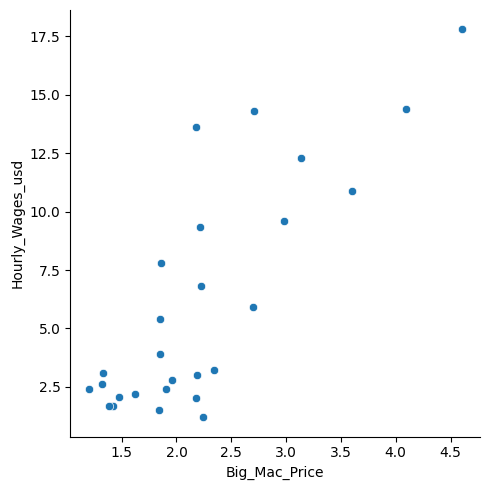

In [10]:
#scatter
sns.relplot(x='Big_Mac_Price',y='Hourly_Wages_usd',data=df)
plt.show()

Linear Regression

In [11]:
import statsmodels.api as sm

In [12]:
import statsmodels.api as sm

model = sm.OLS.from_formula('Hourly_Wages_usd ~ Big_Mac_Price', data=df)

In [13]:
# Fit the model
result = model.fit()

# Print the summary
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Hourly_Wages_usd   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     48.88
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           2.50e-07
Time:                        13:25:33   Log-Likelihood:                -66.251
No. Observations:                  27   AIC:                             136.5
Df Residuals:                      25   BIC:                             139.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.5397      1.619     -2.805

In [14]:
net_hourly_wages_pred = -4.5397 +  4.7435 * df['Big_Mac_Price']

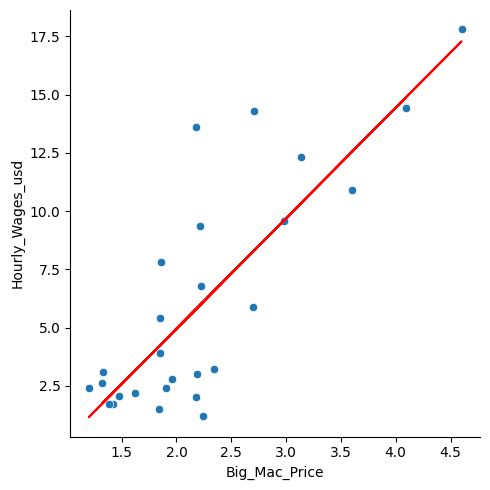

In [15]:
sns.relplot(x='Big_Mac_Price',y='Hourly_Wages_usd',data=df)
plt.plot(df['Big_Mac_Price'],net_hourly_wages_pred,'r-')
plt.show()

### ANOVA
F - statistics = $ \frac{(ssr / df_ssr)}{(sse / df_sse)} $

ANOVA (Analysis of Variance) F-statistics and R-squared are calculated in the context of linear regression to assess the overall significance of the regression model and to quantify the proportion of variance in the dependent variable explained by the independent variables.

Note:  sum of squares due to regression (SSR) by the degrees of freedom associated with regression (df_sse).
SSE stands for Sum of Squared Errors

In [16]:
ssr = np.sum(np.square(net_hourly_wages_pred - net_hourly_wages_pred.mean()))
sse = np.sum(np.square(net_hourly_wages_pred - df['Hourly_Wages_usd'].values))

In [17]:
ssr,sse

(418.1817241247, 213.88429646337502)

In [18]:
df_ssr = 1 # k (no of independent features)
df_sse = 27-1 - df_ssr

In [19]:
F_stats = (ssr/df_ssr)/(sse/df_sse)
F_stats

48.879432833479235

R_Square = 1- $ \frac{(ssc)}{(sst)} $

(R-squared) is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model.


In [20]:
sst = sse + ssr
r_square = 1- (sse/sst)
print('R Square Value =',r_square)

R Square Value = 0.6616108294124452


In [21]:
df

,Big_Mac_Price,Hourly_Wages_usd
0,1.42,1.70
1,1.86,7.80
2,1.48,2.05
3,3.14,12.30
4,2.21,9.35
5,1.96,2.80
6,1.20,2.40
7,1.90,2.40
8,4.09,14.40
9,2.98,9.59


In [22]:
# correlation
df.corr()

,Big_Mac_Price,Hourly_Wages_usd
Big_Mac_Price,1.000000,0.813396
Hourly_Wages_usd,0.813396,1.000000


In [23]:
np.square(0.813396)

0.661613052816

In [24]:
net_hourly_wages_pred = -4.5397 +  4.7435 * 3

In [25]:
net_hourly_wages_pred

9.6908